In [117]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')

In [118]:
# magic to reload modules automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
ff = pd.read_csv('data/5factors.csv')
rt = pd.read_excel('data/north.xlsx' , skiprows=3)
esg = pd.read_excel('data/north31.xlsx', skiprows=3)
print(rt.shape)
print(esg.shape)
print(ff.shape)

(2352, 124)
(12, 739)
(8261, 7)


In [120]:
pd.set_option('display.max_columns',735) # I want to see all the columns
# pd.set_option('display.max_rows',735) 

In [121]:
rt.drop(index=[0,1,2], inplace=True)
rt.reset_index(inplace = True, drop = True) # Drop old index too

In [122]:
rt.rename(columns={'Unnamed: 0':'Date'},inplace = True) 
xx = ['1COV GY Equity','DTG GY Equity','SINCH SS Equity',
                 'SHL GY Equity','NEL NO Equity','DHER GY Equity',
                 'HFG GY Equity','LIN GY Equity','NETS DC Equity',
                 'DAX Index','OMXS30B Index','OMXC25 Index','OMX Index']
drop_these = []
for i in xx:
    for j in range(1,6):
        drop_these.append(i + '.' + str(j))
drop_these = xx + drop_these
rt.drop(columns=xx, inplace = True)

In [123]:
rt.columns = rt.columns.str.replace(' GY', ' G')
rt.columns = rt.columns.str.replace(' SS', ' S')
rt.columns = rt.columns.str.replace(' NO', ' N')
rt.columns = rt.columns.str.replace(' DC', ' D')
rt.columns = rt.columns.str.replace(' Equity', '')
rt.columns = rt.columns.str.replace(' ', '_')

In [124]:
# stupid and long code creating colomn 'year' =)
rt['y'] = str(rt['Date'])
tt = rt['y'].str.split('-', expand=True)
tt = tt[0]
rt['ye'] = tt
ttt = rt['ye'].str.split(' ', expand=True)
rt['year'] = ttt[7]
rt.drop(columns=['y','ye'], inplace = True) 
rt.head()

,Date,ADS_G,AIR_G,ALV_G,BAS_G,BAYN_G,BMW_G,BNR_G,CON_G,DB1_G,DBK_G,DPW_G,DTE_G,EOAN_G,FME_G,FRE_G,HEI_G,HEN3_G,HNR1_G,IFX_G,MBG_G,MRK_G,MTX_G,MUV2_G,PAH3_G,PUM_G,QIA_G,RWE_G,SAP_G,SIE_G,SRT3_G,SY1_G,VNA_G,VOW3_G,ZAL_G,ABB_S,ALFA_S,ALIV_S,ASSAB_S,ATCOA_S,ATCOB_S,AZN_S,BOL_S,ELUXB_S,ERICB_S,ESSITYB_S,EVO_S,GETIB_S,HEXAB_S,HMB_S,INVEB_S,KINVB_S,NDA_S,SAND_S,SCAB_S,SEBA_S,SHBA_S,SKAB_S,SKFB_S,SWEDA_S,SWMA_S,TEL2B_S,TELIA_S,VOLVB_S,AKER_N,AKRBP_N,BAKKA_N,BWLPG_N,BWO_N,DNB_N,DNO_N,ENTRA_N,EQNR_N,FRO_N,GJF_N,LSG_N,MOWI_N,NHY_N,ORK_N,SALM_N,SCHA_N,SUBC_N,TEL_N,TOM_N,TGS_N,YAR_N,STB_N,AMBUB_D,MAERSKA_D,MAERSKB_D,BAVA_D,CARLB_D,CHR_D,COLOB_D,DANSKE_D,DEMANT_D,DSV_D,FLS_D,GMAB_D,GN_D,ISS_D,LUN_D,NOVOB_D,NZYMB_D,ORSTED_D,PNDORA_D,ROCKB_D,RBREW_D,SIM_D,TRYG_D,VWS_D,year
0,2013-04-02 00:00:00,81.61,41.155,108.85,69.52,80.981,68.35,41.8,84.093,48.6,26.747,18.215,8.401,12.413,53.94,32.817,57.19,75.41,61.75,6.115,36.205,59.6,75.06,152.45,58.35,24.385,16.994,29.67,63.12,75.317,20.803,32.01,NaN,157.6,NaN,147.9,150.2,333.437,87.533,144.005,126.346,327.2,104.8,138.252,80.25,NaN,NaN,162.238,25.257,234.7,48.35,71.8445,76.05,100.6,34.399,67,90.18,118.5,159.1,149.1,20.5,109.082,46.86,94.25,221.5,79.996,67.929,NaN,62.158,88.55,10.21,NaN,141.1,63.75,96.95,15.7,55.3,24.7,48,53.25,98.388,134.5,128.6,57.75,227.8,265.7,22.39,10.2,7537.195,7898.473,54.188,571,223,326.9,104.1,99.7,143.2,351.6,139.5,107,NaN,109.3,190.6,204,NaN,168.3,705,104,156.9,73.75,8.9,2013
1,2013-04-03 00:00:00,81.3,40.345,106.95,69.3,81.001,68.39,42.5,84.897,47.91,26.189,18.05,8.357,12.241,54.06,33.02,57.26,75.06,61.37,6.173,35.782,59.85,74.98,150.1,57.99,24.255,17.077,29.07,62.8,73.72,20.62,31.87,NaN,156.15,NaN,146.8,148.9,336.204,87.867,143.928,126.346,325.7,103.4,138.417,80.3,NaN,NaN,163.939,25.357,233.7,47.825,70.864,75.05,99.6,34.623,66.75,89.638,118.4,157.5,146.8,20.48,105.902,46.36,94,222,78.821,68.928,NaN,62.158,87.5,10.04,NaN,141.4,60,97.65,16.05,56.95,24.97,48.4,54,99.447,135.5,129,58.5,229.3,265.6,23.07,10.2,7516.297,7898.473,54.5836,566,215.9,327.5,106.1,100.8,143.3,348,144,106.9,NaN,109.7,193,204.5,NaN,169.2,704.5,104.2,157.2,73.501,8.82,2013
2,2013-04-04 00:00:00,80.04,39.28,106.75,69,80.302,67.57,41.133,82.145,47.805,25.959,17.79,8.523,12.373,55.6,32.927,55.08,73.5,60.01,6.151,35.228,59.8,73.73,149.05,57,23.865,16.714,28.99,61.72,73.282,20.233,31.32,NaN,156.1,NaN,145.1,149.1,333.586,86.967,140.299,122.779,327.2,102.2,138.995,78.85,NaN,NaN,163.615,25.186,231,47.25,70.6857,73.6,97.8,34.379,65.5,88.839,116.9,153.3,144.9,20.9,105.902,43.4,92.15,219.5,77.465,69.677,NaN,60.086,86.55,9.9,NaN,139.3,60,96.95,15.9,55.85,24.98,48.3,53.25,99.182,135.1,127.9,58,220.1,262.5,23.58,10.075,7376.977,7737.422,54.188,562.5,208.3,319.3,104.3,98.4,141.7,346,141.8,107.5,NaN,111,190.3,202,NaN,166.6,695,102.8,154.5,73.174,8.68,2013
3,2013-04-05 00:00:00,78.8,38.125,105.3,66.87,77.812,66.31,40.317,80.85,46.87,25.763,17.295,8.443,12.47,54.84,32.413,52.61,71.56,58.75,6.028,34.417,57.95,71.67,148.75,56.62,23.19,16.252,28.9,59.92,71.387,19.388,30.625,NaN,154.45,NaN,142.1,146.1,326.181,86.9,137.597,120.275,324.3,101.5,136.85,77.6,NaN,NaN,160.537,24.986,230.6,46.675,70.2846,73.3,96.95,33.604,65.15,88.169,115,152,143.2,20.77,102.047,42.78,88.85,214,76.199,70.176,NaN,57.6,84.3,9.785,NaN,137.5,56.75,94.85,15.65,55.85,24.84,47.95,54,96.763,132.1,125,56.5,215,259.9,23.69,9.85,7244.623,7583.374,53.0014,548.5,205.8,317.4,104.1,95.92,137,347.1,138.4,107.2,NaN,111.5,187,196.7,NaN,160.5,690,100,151.5,71.602,8.39,2013
4,2013-04-08 00:00:00,78.72,38.78,104.75,66.7,79.8,66.3,40.533,79.608,46.74,25.7,17.425,8.425,12.329,54.95,32.617,52.83,71.8,59.12,6.011,34.459,58.125,73.04,148.5,57.77,23.315,16.283,28.67,60.01,71.186,19.733,30.645,NaN,156.1,NaN,140.4,145.2,322.292,87.567,136.67,119.44,323.1,101.4,136.685,77.85,NaN,NaN,161.266,25.471,229.1,46.075,71.3543,72.5,96.45,33.339,64.3,87.594,114.5,152.8,143.1,20.94,103.107,43.02,88.35,214,76.109,70.926,NaN,57.6,83.45,9.845,NaN,139.2,61.75,94.6,15.85,56.8,25.1,48,55,97.406,13

In [125]:
esg.drop(columns=drop_these,inplace = True) 
esg.drop(index=[0,2], inplace=True)
esg.rename(columns={'Unnamed: 0':'Date'},inplace = True) 
esg.reset_index(inplace = True, drop = True) 
#esg.set_index('Date', inplace=True)

In [126]:
esg.replace({'ESG_DISCLOSURE_SCORE': 'ESG', 'ENVIRON_DISCLOSURE_SCORE': 'E',
             'SOCIAL_DISCLOSURE_SCORE': 'S','GOVNCE_DISCLOSURE_SCORE': 'G',
             'HISTORICAL_MARKET_CAP' : 'HMCAP', 'CUR_MKT_CAP': 'MCAP'}, inplace=True)

In [127]:
asg = esg.iloc[1] + ' ' + esg.iloc[0]
esg = esg.append(asg, ignore_index=True)
esg.loc[10,'Date'] = 'date'
nnn = esg.loc[10]
esg.rename(columns=nnn, inplace=True)
esg.drop(index=[0,1,10], inplace=True)
esg.reset_index(inplace = True, drop = True)

In [128]:
esg.columns = esg.columns.str.replace(' GY', ' G')
esg.columns = esg.columns.str.replace(' SS', ' S')
esg.columns = esg.columns.str.replace(' NO', ' N')
esg.columns = esg.columns.str.replace(' DC', ' D')
esg.columns = esg.columns.str.replace(' Equity', '')
esg.columns = esg.columns.str.replace(' ', '_')
esg.set_index('date', inplace=True)

In [129]:
esg.head(20)

,ADS_G_ESG,AIR_G_ESG,ALV_G_ESG,BAS_G_ESG,BAYN_G_ESG,BMW_G_ESG,BNR_G_ESG,CON_G_ESG,DB1_G_ESG,DBK_G_ESG,DPW_G_ESG,DTE_G_ESG,EOAN_G_ESG,FME_G_ESG,FRE_G_ESG,HEI_G_ESG,HEN3_G_ESG,HNR1_G_ESG,IFX_G_ESG,MBG_G_ESG,MRK_G_ESG,MTX_G_ESG,MUV2_G_ESG,PAH3_G_ESG,PUM_G_ESG,QIA_G_ESG,RWE_G_ESG,SAP_G_ESG,SIE_G_ESG,SRT3_G_ESG,SY1_G_ESG,VNA_G_ESG,VOW3_G_ESG,ZAL_G_ESG,ABB_S_ESG,ALFA_S_ESG,ALIV_S_ESG,ASSAB_S_ESG,ATCOA_S_ESG,ATCOB_S_ESG,AZN_S_ESG,BOL_S_ESG,ELUXB_S_ESG,ERICB_S_ESG,ESSITYB_S_ESG,EVO_S_ESG,GETIB_S_ESG,HEXAB_S_ESG,HMB_S_ESG,INVEB_S_ESG,KINVB_S_ESG,NDA_S_ESG,SAND_S_ESG,SCAB_S_ESG,SEBA_S_ESG,SHBA_S_ESG,SKAB_S_ESG,SKFB_S_ESG,SWEDA_S_ESG,SWMA_S_ESG,TEL2B_S_ESG,TELIA_S_ESG,VOLVB_S_ESG,AKER_N_ESG,AKRBP_N_ESG,BAKKA_N_ESG,BWLPG_N_ESG,BWO_N_ESG,DNB_N_ESG,DNO_N_ESG,ENTRA_N_ESG,EQNR_N_ESG,FRO_N_ESG,GJF_N_ESG,LSG_N_ESG,MOWI_N_ESG,NHY_N_ESG,ORK_N_ESG,SALM_N_ESG,SCHA_N_ESG,SUBC_N_ESG,TEL_N_ESG,TOM_N_ESG,TGS_N_ESG,YAR_N_ESG,STB_N_ESG,AMBUB_D_ESG,MAERSKA_D_ESG,MAERSKB_D_ESG,BAVA_D_ESG,CARLB_D_ESG,CHR_D_ESG,COLOB_D_ESG,DANSKE_D_ESG,DEMANT_D_ESG,DSV_D_ESG,FLS_D_ESG,GMAB_D_ESG,GN_D_ESG,ISS_D_ESG,LUN_D_ESG,NOVOB_D_ESG,NZYMB_D_ESG,ORSTED_D_ESG,PNDORA_D_ESG,ROCKB_D_ESG,RBREW_D_ESG,SIM_D_ESG,TRYG_D_ESG,VWS_D_ESG,ADS_G_E,AIR_G_E,ALV_G_E,BAS_G_E,BAYN_G_E,BMW_G_E,BNR_G_E,CON_G_E,DB1_G_E,DBK_G_E,DPW_G_E,DTE_G_E,EOAN_G_E,FME_G_E,FRE_G_E,HEI_G_E,HEN3_G_E,HNR1_G_E,IFX_G_E,MBG_G_E,MRK_G_E,MTX_G_E,MUV2_G_E,PAH3_G_E,PUM_G_E,QIA_G_E,RWE_G_E,SAP_G_E,SIE_G_E,SRT3_G_E,SY1_G_E,VNA_G_E,VOW3_G_E,ZAL_G_E,ABB_S_E,ALFA_S_E,ALIV_S_E,ASSAB_S_E,ATCOA_S_E,ATCOB_S_E,AZN_S_E,BOL_S_E,ELUXB_S_E,ERICB_S_E,ESSITYB_S_E,EVO_S_E,GETIB_S_E,HEXAB_S_E,HMB_S_E,INVEB_S_E,KINVB_S_E,NDA_S_E,SAND_S_E,SCAB_S_E,SEBA_S_E,SHBA_S_E,SKAB_S_E,SKFB_S_E,SWEDA_S_E,SWMA_S_E,TEL2B_S_E,TELIA_S_E,VOLVB_S_E,AKER_N_E,AKRBP_N_E,BAKKA_N_E,BWLPG_N_E,BWO_N_E,DNB_N_E,DNO_N_E,ENTRA_N_E,EQNR_N_E,FRO_N_E,GJF_N_E,LSG_N_E,MOWI_N_E,NHY_N_E,ORK_N_E,SALM_N_E,SCHA_N_E,SUBC_N_E,TEL_N_E,TOM_N_E,TGS_N_E,YAR_N_E,STB_N_E,AMBUB_D_E,MAERSKA_D_E,MAERSKB_D_E,BAVA_D_E,CARLB_D_E,CHR_D_E,COLOB_D_E,DANSKE_D_E,DEMANT_D_E,DSV_D_E,FLS_D_E,GMAB_D_E,GN_D_E,ISS_D_E,LUN_D_E,NOVOB_D_E,NZYMB_D_E,ORSTED_D_E,PNDORA_D_E,ROCKB_D_E,RBREW_D_E,SIM_D_E,TRYG_D_E,VWS_D_E,ADS_G_S,AIR_G_S,ALV_G_S,BAS_G_S,BAYN_G_S,BMW_G_S,BNR_G_S,CON_G_S,DB1_G_S,DBK_G_S,DPW_G_S,DTE_G_S,EOAN_G_S,FME_G_S,FRE_G_S,HEI_G_S,HEN3_G_S,HNR1_G_S,IFX_G_S,MBG_G_S,MRK_G_S,MTX_G_S,MUV2_G_S,PAH3_G_S,PUM_G_S,QIA_G_S,RWE_G_S,SAP_G_S,SIE_G_S,SRT3_G_S,SY1_G_S,VNA_G_S,VOW3_G_S,ZAL_G_S,ABB_S_S,ALFA_S_S,ALIV_S_S,ASSAB_S_S,ATCOA_S_S,ATCOB_S_S,AZN_S_S,BOL_S_S,ELUXB_S_S,ERICB_S_S,ESSITYB_S_S,EVO_S_S,GETIB_S_S,HEXAB_S_S,HMB_S_S,INVEB_S_S,KINVB_S_S,NDA_S_S,SAND_S_S,SCAB_S_S,SEBA_S_S,SHBA_S_S,SKAB_S_S,SKFB_S_S,SWEDA_S_S,SWMA_S_S,TEL2B_S_S,TELIA_S_S,VOLVB_S_S,AKER_N_S,AKRBP_N_S,BAKKA_N_S,BWLPG_N_S,BWO_N_S,DNB_N_S,DNO_N_S,ENTRA_N_S,EQNR_N_S,FRO_N_S,GJF_N_S,LSG_N_S,MOWI_N_S,NHY_N_S,ORK_N_S,SALM_N_S,SCHA_N_S,SUBC_N_S,TEL_N_S,TOM_N_S,TGS_N_S,YAR_N_S,STB_N_S,AMBUB_D_S,MAERSKA_D_S,MAERSKB_D_S,BAVA_D_S,CARLB_D_S,CHR_D_S,COLOB_D_S,DANSKE_D_S,DEMANT_D_S,DSV_D_S,FLS_D_S,GMAB_D_S,GN_D_S,ISS_D_S,LUN_D_S,NOVOB_D_S,NZYMB_D_S,ORSTED_D_S,PNDORA_D_S,ROCKB_D_S,RBREW_D_S,SIM_D_S,TRYG_D_S,VWS_D_S,ADS_G_G,AIR_G_G,ALV_G_G,BAS_G_G,BAYN_G_G,BMW_G_G,BNR_G_G,CON_G_G,DB1_G_G,DBK_G_G,DPW_G_G,DTE_G_G,EOAN_G_G,FME_G_G,FRE_G_G,HEI_G_G,HEN3_G_G,HNR1_G_G,IFX_G_G,MBG_G_G,MRK_G_G,MTX_G_G,MUV2_G_G,PAH3_G_G,PUM_G_G,QIA_G_G,RWE_G_G,SAP_G_G,SIE_G_G,SRT3_G_G,SY1_G_G,VNA_G_G,VOW3_G_G,ZAL_G_G,ABB_S_G,ALFA_S_G,ALIV_S_G,ASSAB_S_G,ATCOA_S_G,ATCOB_S_G,AZN_S_G,BOL_S_G,ELUXB_S_G,ERICB_S_G,ESSITYB_S_G,EVO_S_G,GETIB_S_G,HEXAB_S_G,HMB_S_G,INVEB_S_G,KINVB_S_G,NDA_S_G,SAND_S_G,SCAB_S_G,SEBA_S_G,SHBA_S_G,SKAB_S_G,SKFB_S_G,SWEDA_S_G,SWMA_S_G,TEL2B_S_G,TELIA_S_G,VOLVB_S_G,AKER_N_G,AKRBP_N_G,BAKKA_N_G,BWLPG_N_G,BWO_N_G,DNB_N_G,DNO_N_G,ENTRA_N_G,EQNR_N_G,FRO_N_G,GJF_N_G,LSG_N_G,MOWI_N_G,NHY_N_G,ORK_N_G,SALM_N_G,SCHA_N_G,SUBC_N_G,TEL_N_G,TOM_N_G,TGS_N_G,YAR_N_G,STB_N_G,AMBUB_D_G,MAERSKA_D_G,MAERSKB_D_G,BAVA_D_G,CARLB_D_G,CHR_D_G,COLOB_D_G,DANSKE_D_G,DEMANT_D_G,DSV_D_

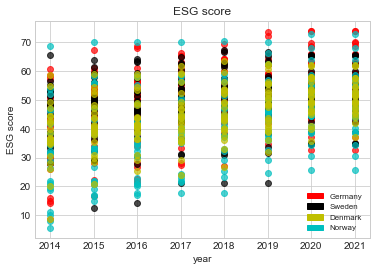

In [156]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(esg.loc[:, 'ADS_G_ESG' : 'ZAL_G_ESG'], 'o',color='r', alpha=0.7)
ax.plot(esg.loc[:, 'ABB_S_ESG' : 'VOLVB_S_ESG'], 'o', color='k',alpha=0.7)
ax.plot(esg.loc[:, 'AKER_N_ESG' : 'STB_N_ESG'], 'o', color='c',alpha=0.7)
ax.plot(esg.loc[:, 'AMBUB_D_ESG' : 'VWS_D_ESG'], 'o',color='y', alpha=0.7)

ax.set_xlabel('year')
ax.set_ylabel('ESG score')
ax.set_title('ESG score')

# Code creating manual legends
r_patch = mpatches.Patch(color='r', label='Germany')
k_patch = mpatches.Patch(color='k', label='Sweden')
c_patch = mpatches.Patch(color='c', label='Norway')
y_patch = mpatches.Patch(color='y', label='Denmark')
ax.legend(handles=[r_patch,k_patch,y_patch,c_patch],prop={'size': 8});